**QUESTION 2**


(200,)


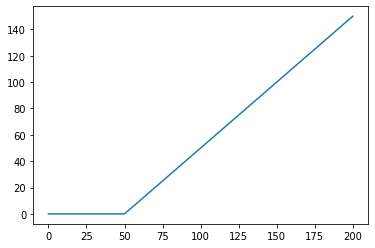

In [105]:
x=np.linspace(0,200,200)#creating an array
y2=[] #creating an empty
for i in range(200): #creating a loop
  if (x[i]-50<0): #Op1 is less than 50
   y2.append(0) #append the list
  else : #else
   y2.append(x[i]-50) #if Op1 is greater than 50
  y1=np.array(y2) #create an array
print(y1.shape) #dimensions of our data
plt.plot(x,y2) #plot x and Op1

(200,)


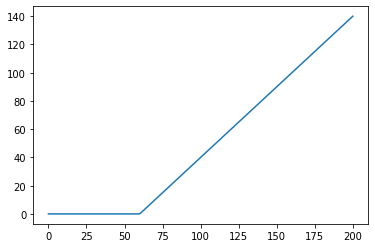

In [106]:
x=np.linspace(0,200,200)
y3=[]
for i in range(200):
  if (x[i]-60<0):
   y3.append(0)
  else :
   y3.append(x[i]-60)
  y1=np.array(y3)
print(y1.shape)
plt.plot(x,y3)

(200,)


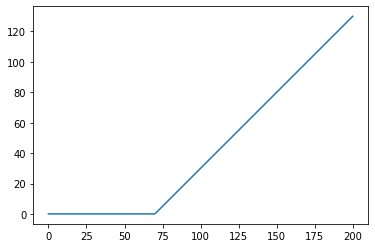

In [107]:
x=np.linspace(0,200,200)
y4=[]
for i in range(200):
  if (x[i]-70<0):
   y4.append(0)
  else :
   y4.append(x[i]-70)
  y1=np.array(y4)
print(y1.shape)
plt.plot(x,y4)

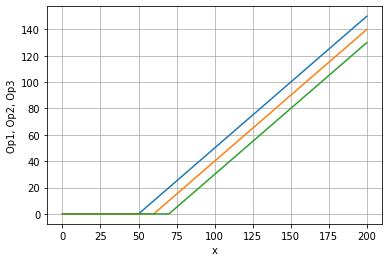

In [108]:
#plotting Op1, Op2, Op3 on the same graph
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.grid()
plt.xlabel('x')
plt.ylabel('Op1, Op2, Op3')
plt.show()

**QUESTION 6**

In [109]:
#Here we import python libraries  
import numpy as np #import numpy for math operations
np.random.seed(1000) #stabilasing the model
import scipy.stats as scs #for probability distributions
import matplotlib as mpl #for constructing figures
import matplotlib.pyplot as plt #for plotting graphs
%matplotlib inline   

import warnings
warnings.filterwarnings('ignore')

In [110]:
#accessing data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
!pip3 install yfinance --upgrade


In [112]:
#Here we define our model
def print_statistics(array):  
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray       (object to generate statistics on)
    '''
    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))


In [113]:
#Here we define our model to perfom tetss on the data
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print ("Skew of data set %14.3f" % scs.skew(arr))
    print ("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print ("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print ("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print ("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [114]:
#import data from amazon
import yfinance as yf
dta=yf.download ("AMZN",start="2004-01-01",end="2022-03-05")

[*********************100%***********************]  1 of 1 completed


In [115]:
import pandas as pd #import pandas to for acessing the file
#downloading the data
close=dta['Adj Close']
data=pd.DataFrame(close.values,columns=['amazon']) 
data.index=close.index

In [116]:
data.head() #describing the data

,amazon
Date,
2004-01-02,51.900002
2004-01-05,53.270000
2004-01-06,53.029999
2004-01-07,51.900002
2004-01-08,50.240002


,amazon
Date,
2004-01-02,NaN
2004-01-05,0.026055
2004-01-06,-0.004516
2004-01-07,-0.021539
2004-01-08,-0.032507


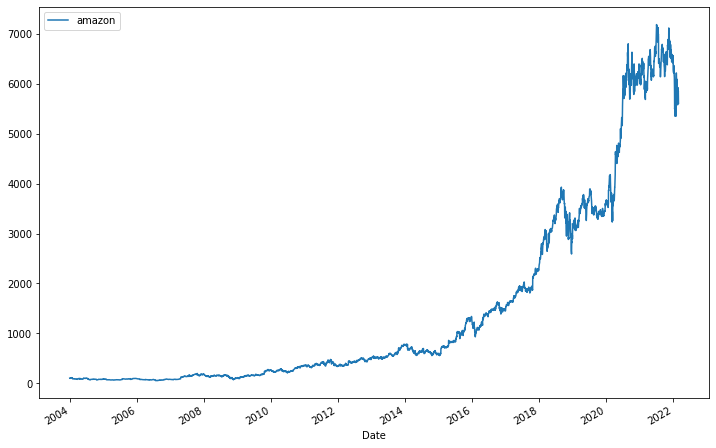

In [117]:
#plotting the data for stock prices
import numpy as np
(data / data.iloc[0] * 100).plot(figsize=(12,8))   
#calculating log returns
log_returns = np.log(data / data.shift(1))
log_returns.head() #viewing the first 5 returns

In [118]:
#dropping empty data sets
data=data.dropna(axis=0,how='any')  
data.head() #viewing the new data set

,amazon
Date,
2004-01-02,51.900002
2004-01-05,53.270000
2004-01-06,53.029999
2004-01-07,51.900002
2004-01-08,50.240002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9351d5b2d0>],
      dtype=object)

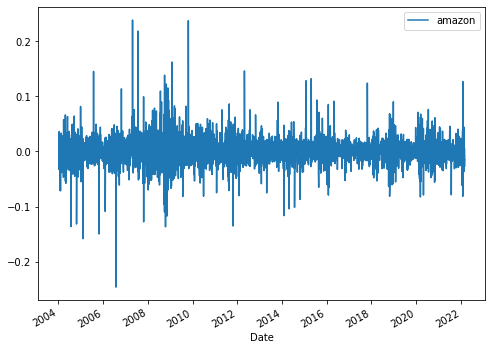

In [119]:
#plot for log returns
log_returns.plot(subplots=True,figsize=(8, 6))

------------------------------
     statistic           value
------------------------------
          size      4574.00000
           min        -0.24618
           max         0.23862
          mean         0.00088
           std         0.02390
          skew         0.34654
      kurtosis        13.54457


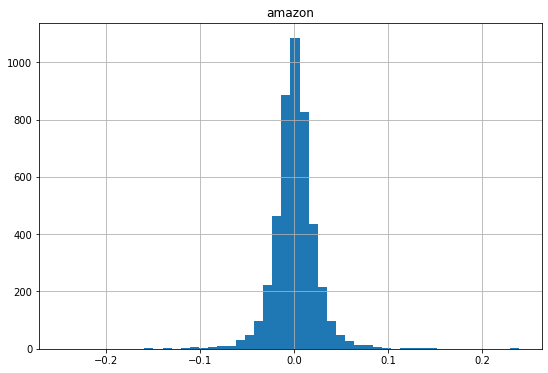

In [120]:
#plotting the histogram for log returns
log_returns.hist(bins=50, figsize=(9, 6))
print (30 * "-")
#creating an array for log returns
log_data = np.array(log_returns.dropna())
print_statistics(log_data)

In [121]:
import scipy.stats as scs 

--------------------------------
Skew of data set          0.347
Skew test p-value          0.000
Kurt of data set         13.545
Kurt test p-value          0.000
Norm test p-value          0.000


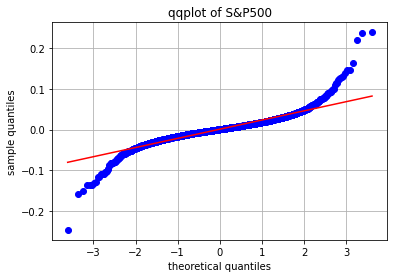

In [122]:
#plotting the QQ plot for log returns
scs.probplot(log_returns['amazon'].dropna(),plot=plt,fit=True)
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title('qqplot of S&P500')
print (32 * "-")
log_data = np.array(log_returns.dropna())
normality_tests(log_data)

Text(0.5, 1.0, 'Autocorrelations of Log-returns of S&P500')

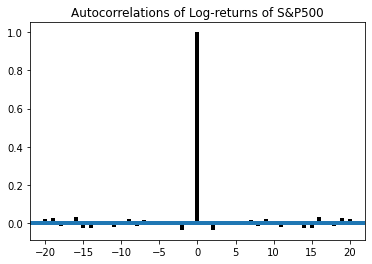

In [123]:
#plotting auto correlation of log returns
plt.acorr(log_returns['amazon'].dropna(), maxlags=20,lw=4)
plt.title('Autocorrelations of Log-returns of S&P500')